In [45]:
# Підключення бібліотек 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [47]:
# Вхідний файл, який містить дані
input_file = 'income_data.txt'

In [49]:
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

In [51]:
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line[:-1].split(',')
        # print(data)

        if data[-1] == ' <=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == ' >50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

In [53]:
X = np.array(X)

In [55]:
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [57]:
categories = {
    'RBF SVM': SVC(kernel='rbf', random_state=0),
    'Linear SVM': LinearSVC(random_state=0),
    'Poly SVM (degree=3)': SVC(kernel='poly', degree=3, random_state=0),
    'Sigmoid SVM': SVC(kernel='sigmoid', random_state=0)
}

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [63]:
for categor in categories.items():
    print(f'\nКласифікатори SVM: {categor[0]}')
    clf = OneVsRestClassifier(categor[1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f'Акуратність: {accuracy*100:.2f}%')
    print(f'Точність: {precision*100:.2f}%')
    print(f'Повнота: {recall*100:.2f}%')
    print(f'F1: {f1*100:.2f}%')
    print('-' * 40)


Класифікатори SVM: RBF SVM
Акуратність: 74.64%
Точність: 55.71%
Повнота: 74.64%
F1: 63.80%
----------------------------------------

Класифікатори SVM: Linear SVM


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Акуратність: 78.30%
Точність: 77.13%
Повнота: 78.30%
F1: 73.93%
----------------------------------------

Класифікатори SVM: Poly SVM (degree=3)
Акуратність: 74.64%
Точність: 55.71%
Повнота: 74.64%
F1: 63.80%
----------------------------------------

Класифікатори SVM: Sigmoid SVM
Акуратність: 63.82%
Точність: 63.56%
Повнота: 63.82%
F1: 63.68%
----------------------------------------


In [65]:
input_data = ['37', ' Private', ' 215646', ' HS-grad', ' 9', ' Never-married', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', ' 0', ' 0', ' 40', ' United-States']


In [67]:
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(item)
    else:
        input_data_encoded[i] = label_encoder[count].transform([item])[0]
        count += 1

input_data_encoded = np.array(input_data_encoded).reshape(1, -1)

In [69]:
for categor in categories.values():
    print(f'\nКласифікатори SVM: {categor.__class__.__name__}')
    categor.fit(X, y)
    predicted_class = categor.predict(input_data_encoded)
    print(label_encoder[-1].inverse_transform(predicted_class)[0])
    print('-' * 40)


Класифікатори SVM: SVC
 <=50K
----------------------------------------

Класифікатори SVM: LinearSVC


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 <=50K
----------------------------------------

Класифікатори SVM: SVC
 <=50K
----------------------------------------

Класифікатори SVM: SVC
 <=50K
----------------------------------------


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [73]:
# Список моделей
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(solver='liblinear')),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Gaussian Naive Bayes': GaussianNB(),
}

results = []
names = []


In [75]:
# Крос-валідація і збір результатів
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results.mean())
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

Logistic Regression: 0.7789 (+/- 0.0083)
Decision Tree: 0.7992 (+/- 0.0085)
K-Nearest Neighbors: 0.7455 (+/- 0.0075)
Linear Discriminant Analysis: 0.7809 (+/- 0.0060)
Gaussian Naive Bayes: 0.7971 (+/- 0.0060)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5180\652785093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results, y=names, palette="viridis")


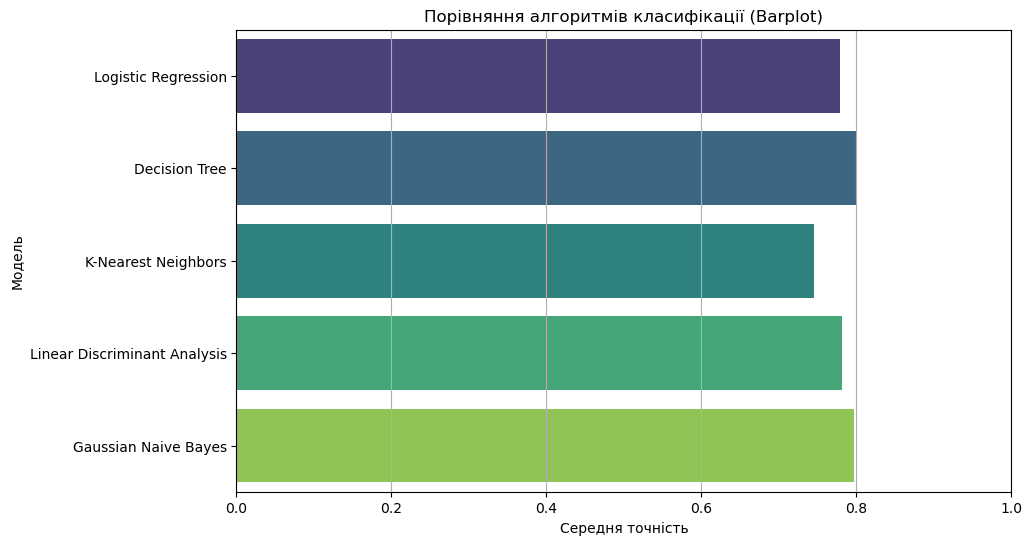

In [77]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
sns.barplot(x=results, y=names, palette="viridis")
plt.xlabel('Середня точність')
plt.ylabel('Модель')
plt.title('Порівняння алгоритмів класифікації (Barplot)')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.show()